In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [25]:
absolute_path = Path().resolve().parent.parent
relative_path = Path('data/processed/Spotify/tidytuesday/spotify_songs.csv')
full_path = absolute_path / relative_path

In [26]:
with open(full_path) as f:
    spotify_metadata = pd.read_csv(f)

In [27]:
spotify_metadata.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [28]:
spotify_metadata.shape

(32833, 23)

Map generes to broad generes

In [1]:
from itertools import chain
from collections import defaultdict

genre_count = {}

broad_genres = {
    "classical": ['classical','baroque','romantic'],
    "blues": ['blues'],
    "country": ['country'],
    "dance": ['dance','edm'],
    "electronic": ['electronic','edm'],
    "folk": ['folk'],
    "hip hop": ['hip hop'],
    "rap": ['rap'],
    "jazz": ['jazz'],
    "rock": ['rock','metal','nwbm','grunge'],
    "r&b": ['r&b'],
    "soul": ['soul'],
    "reggae": ['reggae'],
    "pop": ['pop','boy band','k-pop'],
}

def get_broad_genres(genres):
    mapped_genres = []
    for g in genres:
        for key, value in broad_genres.items():
            print(g)
            print(key, value)
            if g in value:
                mapped_genres.append(key)
    if mapped_genres: 
        mapped_genres = list(np.unique(mapped_genres))
        for g in mapped_genres:
            if g in genre_count:
                genre_count[g] = genre_count.get(g)  + 1
            else:
                genre_count[g] = 1
        return mapped_genres
    else:
        print("No broad genres found")
        return None

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='genres', data = spotify_metadata)

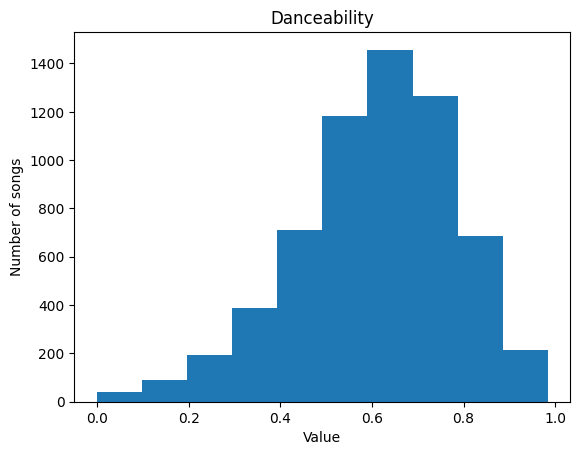

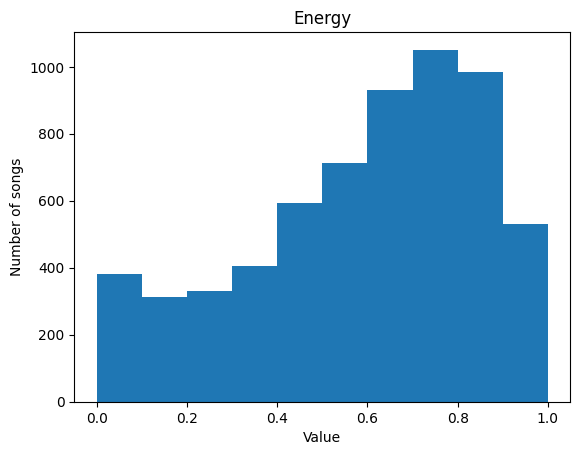

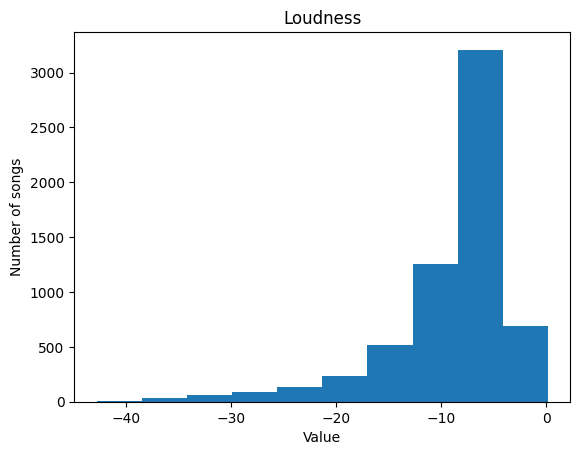

In [13]:
plt.hist(spotify_metadata.danceability)
plt.title("Danceability")
plt.xlabel("Value")
plt.ylabel("Number of songs")
plt.show() 

plt.hist(spotify_metadata.energy)
plt.title("Energy")
plt.xlabel("Value")
plt.ylabel("Number of songs")
plt.show() 

plt.hist(spotify_metadata.loudness)
plt.title("Loudness")
plt.xlabel("Value")
plt.ylabel("Number of songs")
plt.show() 

In [ ]:
""